In [5]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
def f(x):
    return torch.sum(x**2)

x_sgd = torch.randn(1000, requires_grad=True)
x_adam = x_sgd.clone().detach().requires_grad_(True)

sgd_optimizer = optim.SGD([x_sgd], lr=0.01)
adam_optimizer = optim.Adam([x_adam], lr=0.01)

epochs = 500
sgd_losses = []
adam_losses = []


In [7]:
for epoch in range(epochs):
    sgd_optimizer.zero_grad()
    loss_sgd = f(x_sgd)
    loss_sgd.backward()
    sgd_optimizer.step()
    sgd_losses.append(loss_sgd.item())

    adam_optimizer.zero_grad()
    loss_adam = f(x_adam)
    loss_adam.backward()
    adam_optimizer.step()
    adam_losses.append(loss_adam.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, SGD Loss: {loss_sgd.item()}, Adam Loss: {loss_adam.item()}")



Epoch 0, SGD Loss: 1039.043212890625, Adam Loss: 1039.043212890625
Epoch 50, SGD Loss: 137.79747009277344, Adam Loss: 469.6544189453125
Epoch 100, SGD Loss: 18.274642944335938, Adam Loss: 216.86636352539062
Epoch 150, SGD Loss: 2.4235754013061523, Adam Loss: 101.04568481445312
Epoch 200, SGD Loss: 0.32141345739364624, Adam Loss: 46.936431884765625
Epoch 250, SGD Loss: 0.04262572154402733, Adam Loss: 21.652870178222656
Epoch 300, SGD Loss: 0.005653005093336105, Adam Loss: 9.89448356628418
Epoch 350, SGD Loss: 0.0007496989564970136, Adam Loss: 4.46998929977417
Epoch 400, SGD Loss: 9.942475298885256e-05, Adam Loss: 1.994325041770935
Epoch 450, SGD Loss: 1.318566773989005e-05, Adam Loss: 0.8779184818267822


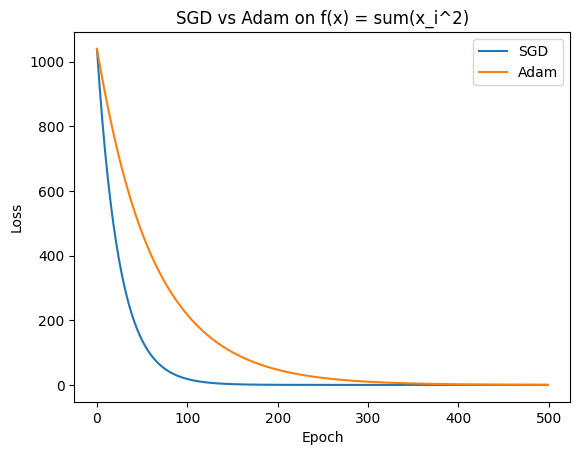

In [8]:
plt.plot(sgd_losses, label="SGD")
plt.plot(adam_losses, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SGD vs Adam on f(x) = sum(x_i^2)")
plt.legend()
plt.show()